<a href="https://colab.research.google.com/github/ailab-nda/NLP/blob/main/EmotionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 演習III 第３回 文章から感情を分析する

出典：https://qiita.com/e10persona/items/7a7643b266c2bdfbf7d0

In [2]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 13.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=ee83413942609a4574d94b29d9efd022b1edd9d60cc4e7767a5ebb2750074fed
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


ライブラリのインポートを行います。

In [3]:
import urllib
from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

## 感情辞書のダウンロード

In [5]:
!wget http://arakilab.media.eng.hokudai.ac.jp/~ptaszynski/ccount/click.php?id=3 -O emotions.zip
!unzip emotions.zip

--2022-02-03 05:43:17--  http://arakilab.media.eng.hokudai.ac.jp/~ptaszynski/ccount/click.php?id=3
Resolving arakilab.media.eng.hokudai.ac.jp (arakilab.media.eng.hokudai.ac.jp)... 133.87.189.142
Connecting to arakilab.media.eng.hokudai.ac.jp (arakilab.media.eng.hokudai.ac.jp)|133.87.189.142|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://arakilab.media.eng.hokudai.ac.jp/~ptaszynski/repository/files/emotions.zip [following]
--2022-02-03 05:43:17--  http://arakilab.media.eng.hokudai.ac.jp/~ptaszynski/repository/files/emotions.zip
Connecting to arakilab.media.eng.hokudai.ac.jp (arakilab.media.eng.hokudai.ac.jp)|133.87.189.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12520 (12K) [application/zip]
Saving to: ‘emotions.zip’

emotions.zip        100%[===================>]  12.23K  76.6KB/s    in 0.2s    

2022-02-03 05:43:18 (76.6 KB/s) - ‘emotions.zip’ saved [12520/12520]

Archive:  emotions.zip
   creating: emotions/
  inf

## 感情辞書の読み込み

In [6]:
emotions = ["aware", "haji", "ikari", "iya", "kowa", "odoroki", "suki", "takaburi", "yasu", "yorokobi"]
emotional_words = {}
for emotion in emotions:
    emotional_words[emotion] = []
    with open("emotions/" + emotion + "_uncoded.txt", "r", encoding="utf-8") as f:
        for line in f:
            line = line.replace('\n','')
            emotional_words[emotion].append(line)

## 小説のスクレイピング

In [7]:
# 青空文庫の作品URL
url = "https://www.aozora.gr.jp/cards/000035/files/301_14912.html"
html = requests.get(url, verify=False)
html.encoding = html.apparent_encoding
soup = BeautifulSoup(html.text, "html.parser")

# タイトルを取得する → <title>～本文～</title>
title = soup.title.string
# 本文を取得する → <div class="main_text">～本文～</div>
sentences = soup.find("div","main_text")
# 文字部分のみを抽出する
sentences = sentences.get_text().replace("\r", "").replace("\n", "").replace("\u3000", "")
# 全角の括弧に囲われた文字と括弧を除去（ルビが括弧文字として存在するため）
sentences = re.sub("（.*?）", "", sentences) 

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## 文章内での感情単語の計測

In [8]:
count_emotions = [0] * len(emotional_words.keys())
for idx, emotion in enumerate(emotional_words.keys()):
    for word in emotional_words[emotion]:
        count_emotions[idx] += sentences.count(word)

for i in range(len(emotions)):
    print(emotions[i], ":", count_emotions[i])

aware : 57
haji : 30
ikari : 22
iya : 232
kowa : 89
odoroki : 30
suki : 53
takaburi : 33
yasu : 53
yorokobi : 141


## 結果のプロット

In [9]:
def plot_polar(labels, values, title):
    angles = np.linspace(0, 2 * np.pi, len(labels) + 1, endpoint=True)
    values = np.concatenate((values, [values[0]]))  # 閉じた多角形にする
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, values, 'o-')  # 外枠
    ax.fill(angles, values, alpha=0.25)  # 塗りつぶし
    ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels, fontsize=15)  # 軸ラベル
    ax.set_rlim(0 ,max(values))
    ax.set_title("「" + title + "」", fontsize=15)

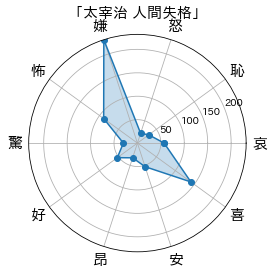

In [10]:
labels = ["哀", "恥", "怒", "嫌", "怖", "驚", "好", "昂", "安", "喜"]
plot_polar(labels, count_emotions, title)

## 課題
好きな文章を使って感情分析をせよ。